## Introduction to Graphs (and Python)

Today we will introduce ourselves to graphs and also to some tricks in Python for working with graphs. You can open this notebook file by donwloading it to your local computer and openning it with Jupyter, or if you have a Jupyter Hub you can download it there using git (instructions in Canvas).

In [32]:
import pip
try:
    import networkx as nx
except ImportError:
    os.system('pip install networkx')
    import networkx as nx

In [33]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    os.system('pip install matplotlib')
    import matplotlib.pyplot as plt

## Example 1

One example of graphs we are all familiar with now at social networks. Consider a small example:  Alicia, Bob, Catlyn, and Diana are on Tweetbook. Alicia and Bob both follow Catlyn and Diana follows all three of the others. Let's represent this relationship graphically:

In [34]:
# Python has some tools for doing this 
# (which is great as your instructor is not very good at drawing)

G = nx.Graph() # Create Python "Graph" object

In [35]:
G.add_nodes_from(['A', 'B', 'C', 'D'])  # We create a collection of nodes or vertices

G.add_edges_from( [('A', 'C'), ('B', 'C'), ('D', 'A'), ('D', 'B'), ('D', 'C')]) 
# We specify which vertices are related or adjacent to each other

In [36]:
# We can check that all of the data is there
G.number_of_nodes(), G.number_of_edges()

(4, 5)

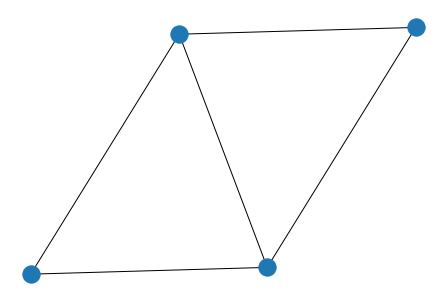

In [37]:
# We can draw our Graph
nx.draw(G)

Questions:  

1. Which vertix is Diana, and why?
2. Which vertix is Charlie, and why?

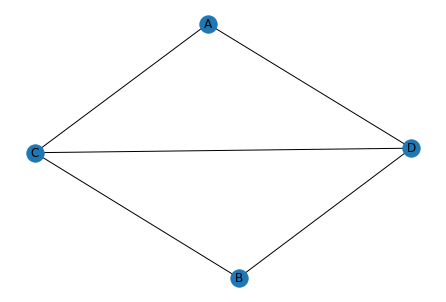

In [38]:
nx.draw(G, with_labels=True)

What is missing in our problem from this representation?

In [39]:
# A direction graph or digraph would include the direction of the relationship

G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D'])  # We create a collection of nodes or vertices

G.add_edges_from( [('A', 'C'), ('B', 'C'), ('D', 'A'), ('D', 'B'), ('D', 'C')]) 
# We specify which vertices are related or adjacent to each other; 
# note that now which vertex is listed first in each pair is important ('A', 'B') is not
# the same as ('B', 'A')

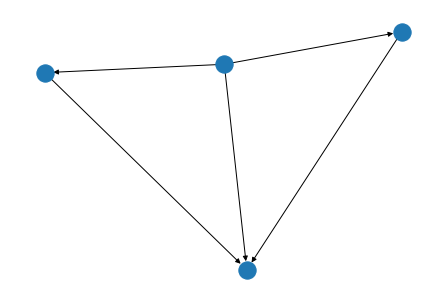

In [40]:
# We can draw our directed graph
nx.draw(G)

## Example 2

A circuit board designed is laying out 4 chips that need to be connected to 4 inputs to the board. Let's draw a graph that captures this

In [41]:
G = nx.Graph()

# In this case we have two types of nodes - chips and inputs
G.add_nodes_from(['A', 'B', 'C', 'D', 1, 2, 3, 4])

# Each input is connected to each node
G.add_edges_from([('A', 1), ('A', 2), ('A', 3), ('A', 4),
                  ('B', 1), ('B', 2), ('B', 3), ('B', 4), 
                  ('C', 1), ('C', 2), ('C', 3), ('C', 4), 
                  ('D', 1), ('D', 2), ('D', 3), ('D', 4), 
                ])

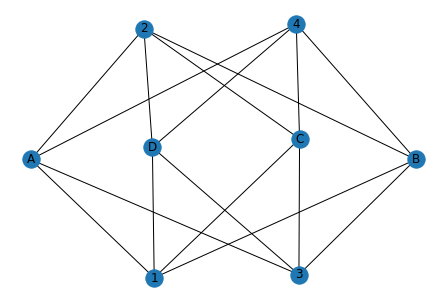

In [42]:
nx.draw(G, with_labels = True)

Some definitions:

1. The **degree** of a vertex is the number of edges coming in to it. What is the degree of each vertex in this graph?
2. This graph is special. It is **bipartite**, the vertices can be divided into two sets that are not themselves interconnected. 
3. One way to think aobut a graph being *bipartite* is that we could **color** the vertices two different colors so that no two vertices of the same coloring are together. One color could be 'Chip' and one color could be 'Input'

In [46]:
# Python can check if a graph is bipartite or not

nx.is_bipartite(G)

True

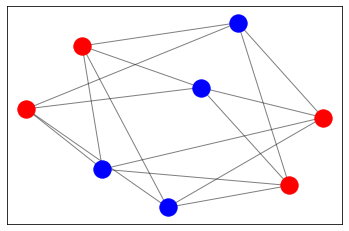

In [50]:
# nodes
# options = {"node_size": 500, "alpha": 0.8}

# Have Python identify where it will draw the nodes
pos = nx.spring_layout(G) 

# Specify the colors for the edges. There are algorithms for doing this, but in this case 
# because of the structure of the problem, we know the coloring.
nx.draw_networkx_nodes(G, pos, nodelist=['A', 'B', 'C', 'D'], node_color="r")
nx.draw_networkx_nodes(G, pos, nodelist=[1, 2, 3, 4], node_color="b")

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5);

Finally note an interesting question about this graph. Because the connections on circuit boards are made by laying conductor on the board, we can only design boards where the paths between two nodes do not cross. The question becomes for the graph, could we draw it so that the edges do not cross?

A graph is called **planar** if there is a way to draw it so that the edges do not cross. 

### Example 3

Maps are very closely related to graphs. Consider the counties of colorado.

<img src="https://www.uncovercolorado.com/wp-content/uploads/2013/12/Map-Colorado-Counties-1200px.png"/>

Note that we could say that two counties are related if they share a border.

In [54]:
G = nx.Graph()

# In this case we have two types of nodes - chips and inputs
G.add_nodes_from(['Moffat', 'Routt', 'Rio Blanco', 'Jackson', 'Grand', 'Eagle', 'Garfield', 
                  'Larimer', 'Weld', 'Boulder', 'Logan', 'Morgan', 'Adams', 'Broomfield', 
                 'Sedgewick', 'Phillips', 'Yuma', 'Washington', 'Kit Carson', 'Lincoln', 
                  'Elbert', 'Arapahoe', 'Denver', 'Jefferson', 'Gilpin', 'Clear Creek', 
                  'Summit', 'Lake', 'Pitkin', 'Mesa', 'Gunnison', 'Delta', 'Montrose', 
                  'Chafee'])

# Each input is connected to each node
G.add_edges_from([('Moffat', 'Routt'), ('Moffat', 'Rio Blanco'), ('Routt', 'Jackson'), 
                  ('Routt', 'Grand'), ('Routt', 'Eagle'), ('Routt', 'Garfield'), 
                  ('Routt', 'Rio Blanco'), ('Jackson', 'Larimer'), ('Jackson', 'Grand'),
                  ('Larimer', 'Weld'), ('Larimer', 'Boulder'), ('Larimer', 'Grand'),
                  ('Weld', 'Logan'), ('Weld', 'Morgan'), ('Weld', 'Adams'), 
                  ('Weld', 'Broomfield'), ('Weld', 'Boulder'), ('Logan', 'Swedgewick'), 
                  ('Logan', 'Phillips'), ('Logan', 'Yuma'), ('Logan', 'Washington'), 
                  ('Logan', 'Morgan'), ('Sedgewick', 'Phillips'), ('Phillips', 'Yuma'),
                  ('Yuma', 'Kit Carson'), ('Yuma', 'Washington'), ('Washington', 'Kit Carson'),
                  ('Washington', 'Lincoln'), ('Washington', 'Elbert'), 
                  ('Washington', 'Arapahoe'), ('Washington', 'Adams'), 
                  ('Washington', 'Morgan'), ('Morgan', 'Adams'), ('Adamas', 'Arapahoe'), 
                  ('Adams', 'Denver'), ('Adams', 'Broomfield'), ('Broomfield', 'Jefferson'),
                  ('Broomfield', 'Boulder'), ('Boulder', 'Jefferson'), ('Boulder', 'Gilpin'),
                  ('Boulder', 'Grand'), ('Grand', 'Gilpin'), ('Grand', 'Clear Creek'), 
                  ('Grand', 'Summit'), ('Grand', 'Eagle'), ('Eagle', 'Summit'), 
                  ('Eagle', 'Lake'), ('Eagle', 'Pitkin'), ('Eagle', 'Garfield'),
                  ('Garfield', 'Pitkin'), ('Garfield', 'Mesa'), ('Garfield', 'Rio Blanco'),
                  ('Mesa', 'Pitkin'), ('Mesa', 'Gunnison'), ('Mesa', 'Delta'), 
                  ('Mesa', 'Montrose'), ('Pitkin', 'Lake'), ('Pitkin', 'Chafee'), 
                  ('Pitkin', 'Gunnison'), 
                  
                ]

NetworkXError: Edge tuple () must be a 2-tuple or 3-tuple.